In [1]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]


/home/alan/dev/AI-4-Alan/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [01:18<00:00,  1.56s/it]


In [ ]:
import torch
from diffusers import FluxPipeline
from optimum.quanto import freeze, qfloat8, quantize

from transformers import CLIPTextModel, CLIPTokenizer, T5EncoderModel, T5TokenizerFast

# dtype = torch.bfloat16
# bfl_repo = "black-forest-labs/FLUX.1-dev"

# scheduler = FlowMatchEulerDiscreteScheduler.from_pretrained(bfl_repo, subfolder="scheduler")
# text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")
# tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
# text_encoder_2 = T5EncoderModel.from_pretrained(bfl_repo, subfolder="text_encoder_2", torch_dtype=dtype)
# tokenizer_2 = T5TokenizerFast.from_pretrained(bfl_repo, subfolder="tokenizer_2", torch_dtype=dtype)
# vae = AutoencoderKL.from_pretrained(bfl_repo, subfolder="vae", torch_dtype=dtype)
# transformer = FluxTransformer2DModel.from_pretrained(bfl_repo, subfolder="transformer", torch_dtype=dtype)

# quantize(transformer, weights=qfloat8)
# freeze(transformer)

# quantize(text_encoder_2, weights=qfloat8)
# freeze(text_encoder_2)

pipe = FluxPipeline(
    scheduler=scheduler,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    text_encoder_2=text_encoder_2,
    tokenizer_2=tokenizer_2,
    vae=vae,
    transformer=transformer,
)
pipe.enable_model_cpu_offload()


ImportError: cannot import name 'FluxTransformer2DModel' from 'diffusers' (/home/alan/dev/AI-4-Alan/.venv/lib/python3.12/site-packages/diffusers/__init__.py)

In [2]:
def get_image(prompt: str, size = (1024, 1024)) -> torch.Tensor:
    image = pipe(
        prompt,
        height=size[1],
        width=size[0],
        guidance_scale=3.0,
        num_inference_steps=40,
        max_sequence_length=512,
        # generator=torch.Generator("cpu").manual_seed(0)
    ).images[0]
    return image

def generate_images(prompt, save_dir, size, num):
    from pathlib import Path
    save_dir = Path(save_dir)
    save_dir.mkdir(parents=True, exist_ok=True)
    for i in range(num):
        image = get_image(prompt, size)
        image.save(save_dir / ("image_" + str(i) + ".png"))
        image.resize((640, 360)).show()

In [ ]:
generate_images("Green cartoon robot agent completing multiple AI tasks like detection, classification, segmentation in order to help humans...", size=(1280, 720), save_dir="output3", num=50)

100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


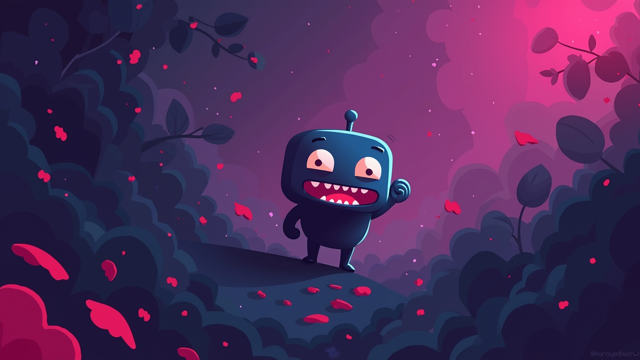

100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


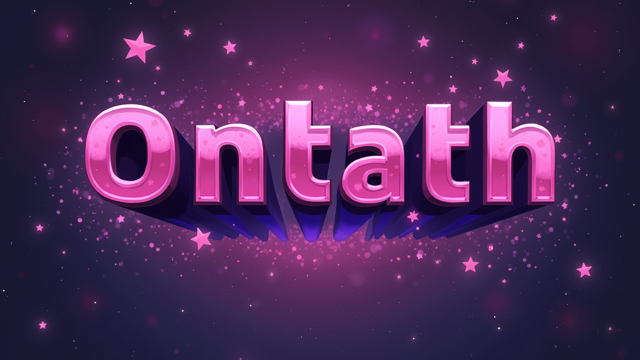

100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


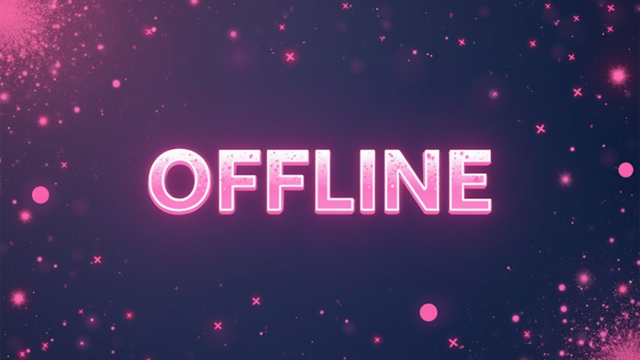

100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


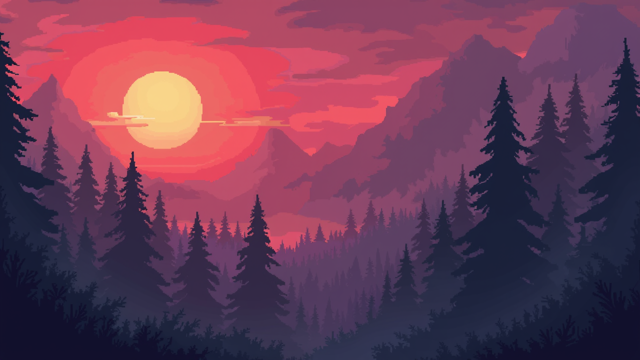

100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


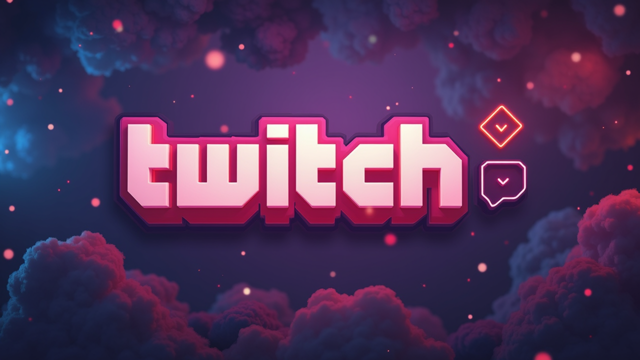

100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


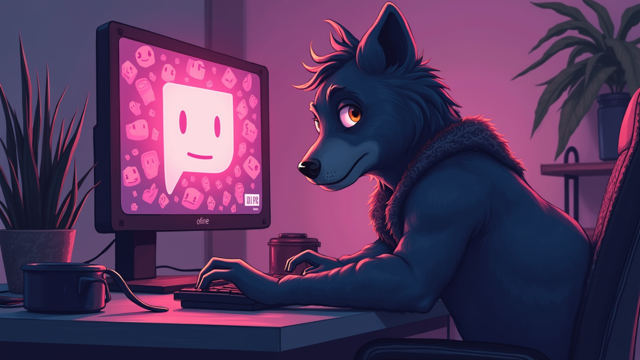

100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


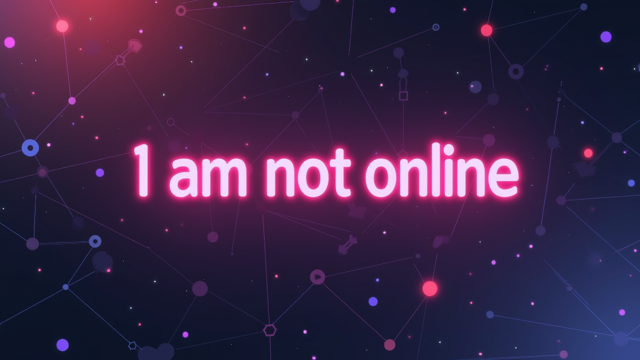

100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


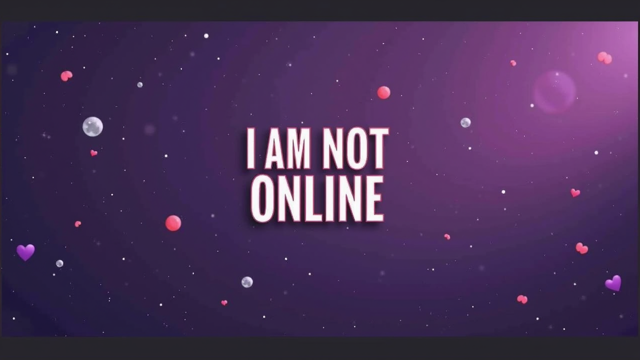

100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


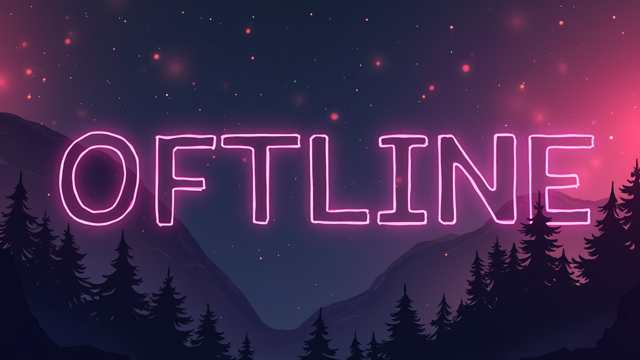

100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


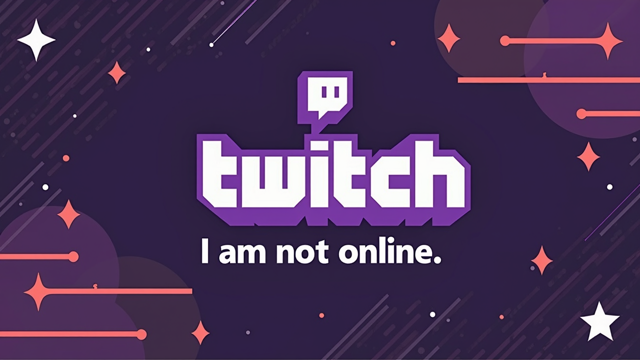

In [3]:
generate_images("An offline banner for twitch for users to see that I am not online", size=(1280, 720), save_dir="output3", num=10)

100%|██████████| 40/40 [00:57<00:00,  1.44s/it]


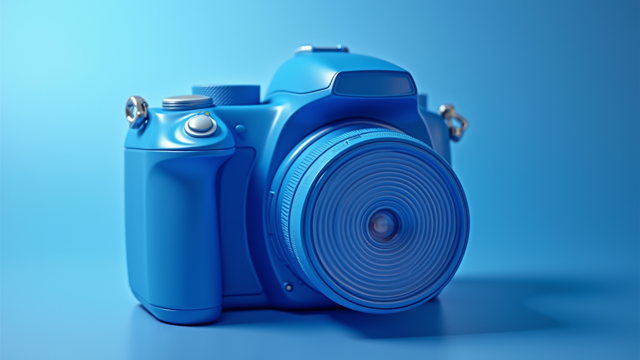

100%|██████████| 40/40 [00:58<00:00,  1.45s/it]


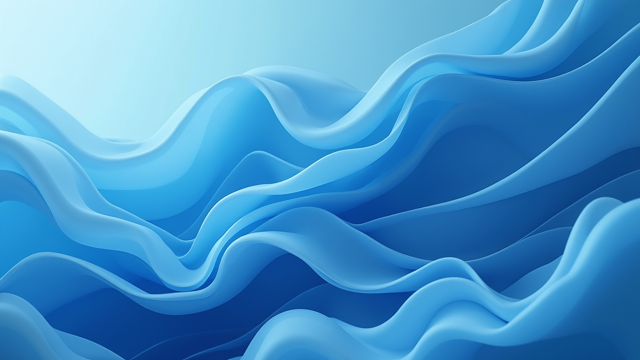

100%|██████████| 40/40 [00:58<00:00,  1.45s/it]


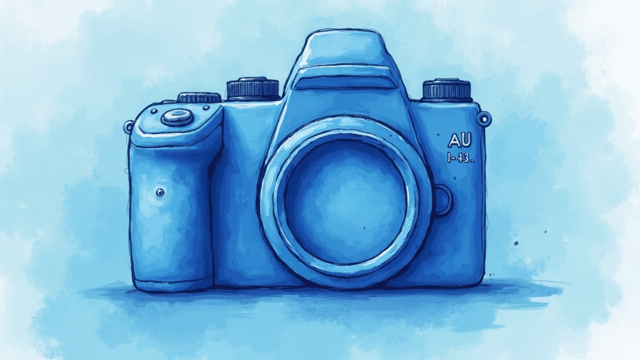

100%|██████████| 40/40 [00:57<00:00,  1.44s/it]


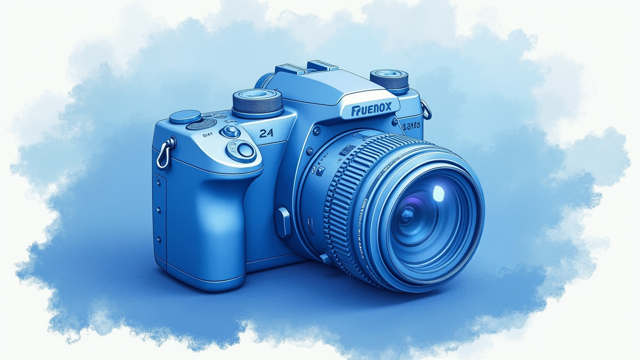

In [4]:
generate_images("A blue contour made for my camera. An overlay", size=(1280, 720), save_dir="output/1", num=4)